In [129]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from string import punctuation
from sklearn.feature_extraction import stop_words
stopwords = stop_words.ENGLISH_STOP_WORDS

In [128]:
len(wordcloud_stopwords)

192

In [ ]:
len(stopwords)

In [2]:
punctuation_custom = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'
punctuation_custom

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'

In [170]:
df_raw = pd.read_csv('../data/mbti_1.csv')

In [171]:
df_test = df_raw #[:650]  #650
df_test.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [172]:
#  Join all posts to one string for each user
df_test['posts'] = df_test['posts'].str.replace("\|\|\|", " ")
# df_test['posts'][0]

In [173]:
# group by user into condensed df
df2 = df_test.groupby('type')['posts'].apply(lambda x: "%s" % ', '.join(x)).reset_index()
# df2['type']

In [174]:
# Make a doc list of all text from the dataframe for each user type
type_list = df2['type'].tolist()
docs = df2['posts'].tolist()
# docs
# type_list

In [175]:
custom_stopwords = {"like", "just", "people", "don","really","ve","http","com", "make", "good", "things", 
                    "https", "say", "way", "going", "lot", "thing", "best", "www", "youtube", "ll", "pretty",
                   "sure", "yes", "no", "actually", "right", "said", "thanks", "person", "watch", "did",
                    "said", "does", "maybe", "probably", "type", "types", "doesn", "work", "life", "want", "need",
                   "didn", "mean", "yeah", "usually", "got", "look", "use", "day", "long","years", "year",
                   "think", "know", "feel", "love", "friend", "friends", "thinking", "thought", "thread", "post"}
stopwords_set = stopwords | custom_stopwords
len(custom_stopwords)

63

In [176]:
cv = CountVectorizer(docs,stop_words=stopwords_set,min_df=2)
count_vector=cv.fit_transform(docs)
count_vector.shape

(16, 50351)

In [177]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [178]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
gotten,1.000000
committed,1.000000
date,1.000000
support,1.000000
manager,1.000000
...,...
ipa,2.734601
ious,2.734601
iostream,2.734601
scape,2.734601


In [181]:
# word counts for the docs - sparse matrix form
count_vector=cv.transform(docs)
 
# compute tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [185]:
feature_names = cv.get_feature_names()

type_id = 10
# get tfidf vector for first document
document_vector_first = tf_idf_vector[type_id]
 
# print the scores
df = pd.DataFrame(document_vector_first.T.todense(), index=feature_names, columns=[f"tfidf-{type_list[type_id]}"])
ranked_word_list = df.sort_values(by=[f"tfidf-{type_list[type_id]}"],ascending=False).reset_index()
ranked_word_list.head(20)

,index,tfidf-INTJ
0,intj,0.400136
1,time,0.279652
2,intjs,0.118228
3,read,0.101266
4,try,0.093412
5,point,0.091407
6,better,0.088065
7,understand,0.086310
8,different,0.082133
9,world,0.079626


In [ ]:
def
feature_names = cv.get_feature_names()
for type_id in range(len(type_list)):
    document_vector = tf_idf_vector[type_id]
    df = pd.DataFrame(document_vector.T.todense(), index=feature_names, columns=[f"tfidf-{type_list[type_id]}"])
    ranked_word_list = df.sort_values(by=[f"tfidf-{type_list[type_id]}"],ascending=False).reset_index()
    return ranked_word_list

In [186]:
word_cloud_string = ""
word_cloud_size = 200
scale = 1000
for word in range(word_cloud_size):
    num_occ = int(round(ranked_word_list[f"tfidf-{type_list[type_id]}"][word_cloud_size] * scale))
    word_cloud_string += ((ranked_word_list['index'][word] + " ") * num_occ)
# word_cloud_string

In [144]:
ranked_word_list[f"tfidf-{type_list[type_id]}"][200]

0.0289093609981013

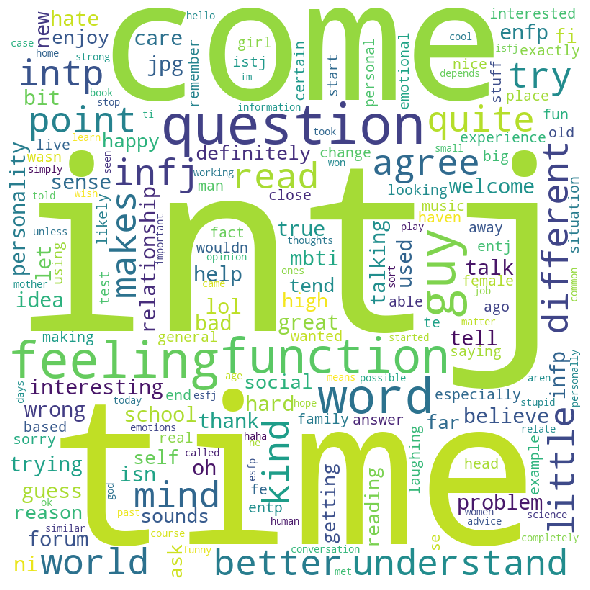

In [156]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                collocations=False,
                min_font_size = 10).generate(word_cloud_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [15]:
type_list

['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTJ',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFJ',
 'ISFP',
 'ISTJ',
 'ISTP']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [23]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
to,0.398408
the,0.363429
and,0.327955
you,0.252773
of,0.225328
...,...
emersing,0.000000
emerl98,0.000000
emerging,0.000000
emerges,0.000000


In [ ]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)

In [ ]:
word_count_vector.shape

In [ ]:
cv2 = CountVectorizer(docs,stop_words=stopwords,min_df=1)
count_vector2=cv2.fit_transform(docs)
count_vector2.shape

In [ ]:
list_len =[]
for a in range(df_test.shape[0]):
    list_len.append(len(df_test['posts'][a]))
print(list_len, df_test['type'])

In [ ]:
len(df2['posts'][0])

In [ ]:
df2.head(20)

In [ ]:
df2['posts'][0] 

In [ ]:
len(docs)

In [ ]:
doc_len = []
for i in range(len(docs)):
    doc_len.append(len(docs[i]))
doc_len

In [ ]:
def to_lowercase(df, col):
    df[col] = df[col].str.lower()
    return  df
df_lw = to_lowercase(df_test, 'posts')
df_lw.head()

In [ ]:
def remove_punctuation(df, col, punctuation = punctuation):
    for post_set in range(df.shape[0]):
        df[col][post_set] = ''.join([char for char in df[col][post_set] if char not in punctuation])
    return df
df_lw_np = remove_punctuation(df_lw, 'posts', punctuation = punctuation_custom)
df_lw_np

In [ ]:
#  Strip quotes
def remove_first_last_quote(dataframe, col):
    dataframe[col] = dataframe[col].str[1:-1]
    return dataframe
df_raw_no_quote = remove_first_last_quote(df_test, 'posts')
df_raw_no_quote.head()

In [ ]:
df_raw_no_quote.posts = df_raw_no_quote.posts.str.split('\|\|\|')
df_raw_no_quote.head()

In [ ]:
# df_raw_no_quote['posts_split'] = ""

for user in range(df_raw_no_quote.shape[0]):
#     breakpoint()
    user_word_list = []
    for post_lst in range(len(df_raw_no_quote['posts'][user])):
        user_word_list += df_raw_no_quote['posts'][user][post_lst].split()
    user_word_list2 = [x for x in user_word_list if not x.startswith("http")]
    df_raw_no_quote['posts'][user] = user_word_list2
    
df_raw_no_quote.head()

In [ ]:
len(df_raw_no_quote['posts'][2])

In [ ]:
df_word_list_by_type_raw = df_raw_no_quote.groupby('type').agg({'posts': 'sum'})
df_word_list_by_type_raw.head(20)

In [ ]:
len(df_word_list_by_type_raw['posts'][11])

In [ ]:
df_word_list_by_type_raw['posts'].map(lambda x: list(map(str.lower, x)))
df_word_list_by_type_raw.head(20)

In [ ]:
type_list = df_raw['type'].head(650)
print(set(type_list))

In [ ]:
def split_df_col_text_by_delim(df, col, delim=" "):
    df[col] = df[col].str.split(delim)
    return df

In [ ]:
df_raw_no_quote.shape[0]

In [ ]:
for user in range(df_raw_no_quote.shape[0]):
    user_word_list = []
    for post in range(len(df_raw_no_quote['posts'][user])):
        len(df_raw_no_quote['posts'][user][post].str.split(" ")
        user_word_list += df_raw_no_quote['posts'][user][post]

In [ ]:
df_raw_no_quote['posts'][0]
user = 0
post_lst = 2
df_raw_no_quote['posts'][user][post_lst].split()

In [ ]:
len(df_raw_no_quote['posts_split'][0])

In [ ]:
df_raw_no_quote['posts_split'][0]

In [ ]:
fruits = {"apple", "banana", "cherry"}

fruits.discard("banana")

print(fruits)

In [ ]:
df_raw_no_quote.shape[0]

In [ ]:
import re
re.split(' |\|\|\|',str)

In [ ]:
df_raw_no_quote.posts = df_raw_no_quote.posts.str.split(' ')
df_raw_no_quote.head()

In [ ]:
# https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

In [ ]:
tfidf_transformer = TfidfTransformer()
>>> X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
>>> X_train_tfidf.shape

In [ ]:
# https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.Xo871shKiUk
